## 在线性回归中实现梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
# x是１００个 数组
x = 2 * np.random.random(size=100)
# 截距是４，theta是３ ， ｙ 也是１００个值的数组, np.random.normal(size=100)噪音，均值有0方差为1
y = x * 3. + 4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1, 1) # 100 行  1列

In [4]:
X[:20]

array([[1.40087424],
       [1.68837329],
       [1.35302867],
       [1.45571611],
       [1.90291591],
       [0.02540639],
       [0.8271754 ],
       [0.09762559],
       [0.19985712],
       [1.01613261],
       [0.40049508],
       [1.48830834],
       [0.38578401],
       [1.4016895 ],
       [0.58645621],
       [1.54895891],
       [0.01021768],
       [0.22571531],
       [0.22190734],
       [0.49533646]])

In [5]:
y[:20]

array([8.91412688, 8.89446981, 8.85921604, 9.04490343, 8.75831915,
       4.01914255, 6.84103696, 4.81582242, 3.68561238, 6.46344854,
       4.61756153, 8.45774339, 3.21438541, 7.98486624, 4.18885101,
       8.46060979, 4.29706975, 4.06803046, 3.58490782, 7.0558176 ])

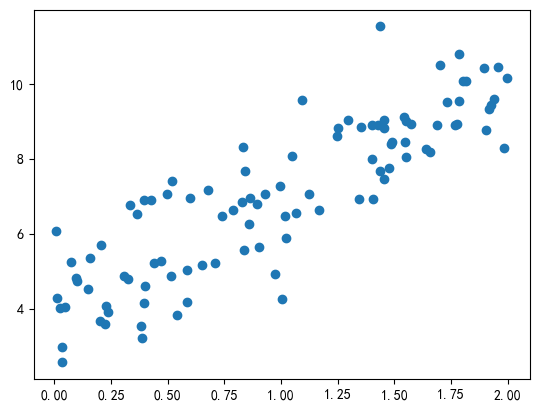

In [6]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

In [7]:
# 求均方差，mes , theta 是一个数组，X_b 是一个矩阵 ，ｎ行ｉ列， n=len(X_b)
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        # 异常则给 浮点数中的最大值
        return float('inf')

In [8]:
# 求导 （也就是损失值)
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    # 第０行特殊
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        #  X_b[:,i] 代表， 第几列
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
        print(res[i])
    return res * 2 / len(X_b)

In [9]:
# 求梯度下降中的 最优theta 
# initial_theta 初始化theta
# n_iters 迭代次数控制
# eta 学习率
# X_b 矩阵
# y 结果值
# epsilon 接受的误差值
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [10]:
# 追加一列，截距处理 ＊ 固定值１ ，x0=1 
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
print(X_b.shape[1]) # 2列， 本身只有一列，现在多了一列 截距
#初始化 ｔｈｅｔａ 为２个０ 
initial_theta = np.zeros(X_b.shape[1])
print(initial_theta)
# 学习率
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

2
[0. 0.]
-797.683929083539
-762.6179175433883
-729.0731956976042
-696.9838322369745
-666.2867530252358
-636.9216172825461
-608.8306991345848
-581.9587742947595
-556.2530116570726
-531.662869586846
-508.1399967057182
-485.63813697615376
-464.11303889914484
-443.5223686468595
-423.82562695971114
-404.98406964472053
-386.96063151910613
-369.7198536498001
-353.2278137460653
-337.4520595685672
-322.3615452241853
-307.9265702215084
-294.1187211673789
-280.9108159900346
-268.2768505793587
-256.19194773949107
-244.63230835359303
-233.57516466490267
-222.99873558237059
-212.8821839231386
-203.20557550793
-193.9498400290529
-185.09673361420136
-176.62880301256536
-168.52935133294733
-160.7824052666275
-153.37268373063705
-146.2855678698843
-139.50707235924864
-133.0238179493067
-126.82300520179834
-120.89238936327436
-115.22025632760237
-109.79539964014532
-104.60709849847078
-99.64509670640669
-94.89958254012964
-90.36116948676259
-86.02087781767102
-81.87011696028725
-77.90066863385596
-74.10

In [11]:
theta
# 4代表截距， ３代表 theta,这里只有一列

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [12]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [13]:
lin_reg.coef_

array([3.00706277])

In [14]:
lin_reg.intercept_

np.float64(4.021457858204859)